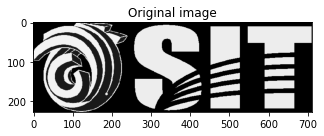

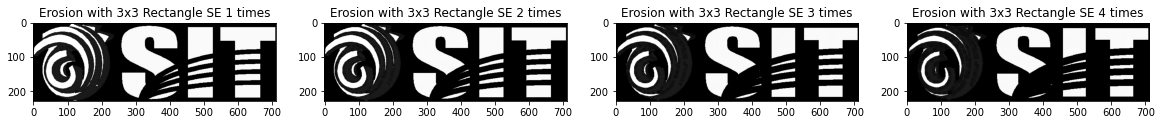

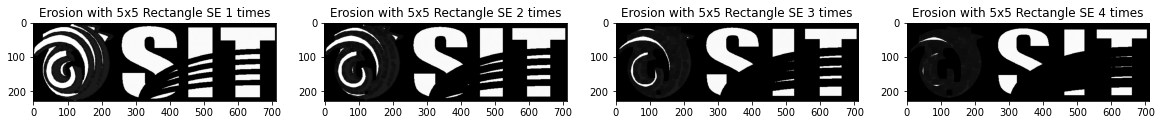

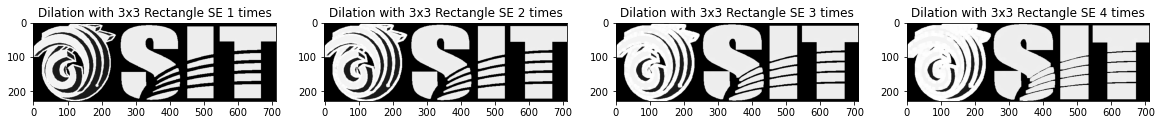

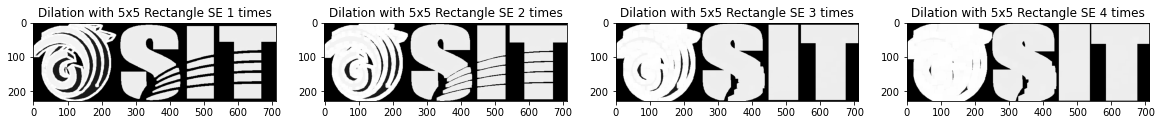

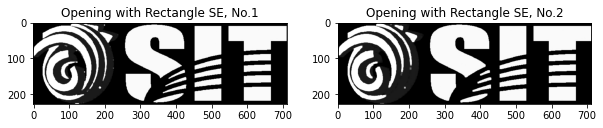

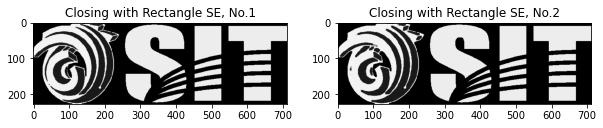

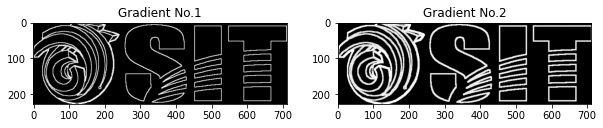

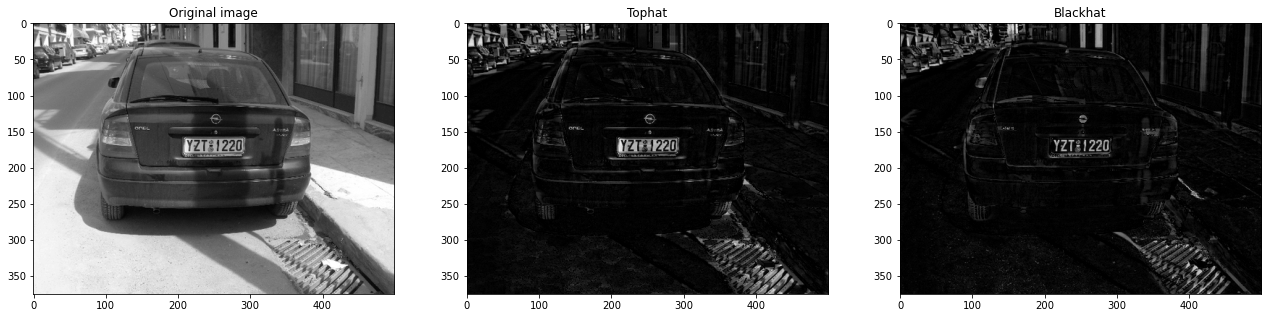

In [42]:
import cv2
from matplotlib import pyplot as plt

#Create path and load image
path = '../images/sit.jpg'
path2 = '../images/car.png'
image = cv2.imread(path)
image2 = cv2.imread(path2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(image)

#Create structuring element (look like a kernel in convolution)
#The function is cv2.getStructuringElement(shape, ksize, anchor (default = (-1,-1) at center))
#shape has 3 choices
#cv2.MORPH_RECT --> a rectangular structuring element (all members are 1)
#cv2.MORPH_CROSS --> a cross-shaped structuring element
#cv2.MORPH_ELLIPSE --> an elliptic structiruing element, that is a filled ellipse inscribed into the rectangle
RE33 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
CR33 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
EL33 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
RE55 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
CR55 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
EL55 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
special = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title("Original image")
ax.imshow(image, cmap='gray')

#Apply erosion and show image
fig1 = plt.figure(figsize=(20, 15))
fig1.tight_layout(pad=3)
fig2 = plt.figure(figsize=(20, 15))
fig2.tight_layout(pad=3)
fig3 = plt.figure(figsize=(20, 15))
fig3.tight_layout(pad=3)
fig4 = plt.figure(figsize=(20, 15))
fig4.tight_layout(pad=3)
fig5 = plt.figure(figsize=(10, 7))
fig5.tight_layout(pad=3)
fig6 = plt.figure(figsize=(10, 7))
fig6.tight_layout(pad=3)
fig7 = plt.figure(figsize=(10, 7))
fig7.tight_layout(pad=3)

for ax, i in zip(("ax1", "ax2", "ax3", "ax4"), (1,2,3,4)):
    eroded = cv2.erode(image.copy(), RE33, iterations=i)
    locals()[ax] = fig1.add_subplot(1,4, i)
    locals()[ax].set_title("Erosion with 3x3 Rectangle SE {} times".format(i))
    locals()[ax].imshow(eroded, cmap='gray')

for ax, i in zip(("ax1", "ax2", "ax3", "ax4"), (1,2,3,4)):
    eroded = cv2.erode(image.copy(), RE55, iterations=i)
    locals()[ax] = fig2.add_subplot(1,4, i)
    locals()[ax].set_title("Erosion with 5x5 Rectangle SE {} times".format(i))
    locals()[ax].imshow(eroded, cmap='gray')

for ax, i in zip(("ax1", "ax2", "ax3", "ax4"), (1,2,3,4)):
    dilated = cv2.dilate(image.copy(), RE33, iterations=i)
    locals()[ax] = fig3.add_subplot(1,4, i)
    locals()[ax].set_title("Dilation with 3x3 Rectangle SE {} times".format(i))
    locals()[ax].imshow(dilated, cmap='gray')
    
for ax, i in zip(("ax1", "ax2", "ax3", "ax4"), (1,2,3,4)):
    dilated = cv2.dilate(image.copy(), RE55, iterations=i)
    locals()[ax] = fig4.add_subplot(1,4, i)
    locals()[ax].set_title("Dilation with 5x5 Rectangle SE {} times".format(i))
    locals()[ax].imshow(dilated, cmap='gray')

for ax, i, kernel in zip(("ax1", "ax2"), (1,2), (RE33, RE55)):
    opened = cv2.morphologyEx(image.copy(), cv2.MORPH_OPEN, kernel)
    locals()[ax] = fig5.add_subplot(1,2, i)
    locals()[ax].set_title("Opening with Rectangle SE, No.{}".format(i))
    locals()[ax].imshow(opened, cmap='gray')

for ax, i, kernel in zip(("ax1", "ax2"), (1,2), (RE33, RE55)):
    closed = cv2.morphologyEx(image.copy(), cv2.MORPH_CLOSE, kernel)
    locals()[ax] = fig6.add_subplot(1,2, i)
    locals()[ax].set_title("Closing with Rectangle SE, No.{}".format(i))
    locals()[ax].imshow(closed, cmap='gray')

for ax, i, kernel in zip(("ax1", "ax2"), (1,2), (RE33, RE55)):
    gradient = cv2.morphologyEx(image.copy(), cv2.MORPH_GRADIENT, kernel)
    locals()[ax] = fig7.add_subplot(1,2, i)
    locals()[ax].set_title("Gradient No.{}".format(i))
    locals()[ax].imshow(gradient, cmap='gray')
    
#A top hat operation is used to reveal bright regions of an image on dark backgrounds.
#To reveal our license plate characters you would first segment out the license plate itself 
#via a top hat operator and then apply a black hat operator (or thresholding) to extract the individual 
#license plate characters (perhaps using methods like contour detection).

tophat = cv2.morphologyEx(image2, cv2.MORPH_TOPHAT, special)
blackhat = cv2.morphologyEx(image2, cv2.MORPH_BLACKHAT, special)

fig8 = plt.figure(figsize=(22, 13))
fig8.tight_layout(pad=3)
ax1 = fig8.add_subplot(1,3,1)
ax1.set_title("Original image")
ax1.imshow(image2, cmap='gray')
ax2 = fig8.add_subplot(1,3,2)
ax2.set_title("Tophat")
ax2.imshow(tophat, cmap='gray')
ax3 = fig8.add_subplot(1,3,3)
ax3.set_title("Blackhat")
ax3.imshow(blackhat, cmap='gray')
